In [56]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [57]:
from google.colab import drive #mount google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis Statistical Interoretation and Visualizations.

In [58]:
data = pd.read_csv('/content/drive/MyDrive/Coursework/bangladesh_divisions_dataset.csv') #Load the dataset.

a) When and by whom was the dataset created?
   
   The dataset was created by Arif Miah . When it was created is unknown but it says 1 month ago in kaggle.

b) How did you access the dataset?
   
   I accessed the dataset through kaggle.

c)How does it align with the chosen UNSDG?
  
  It is study on sustainable and food for all part of UNSDG.

d) List all the attributes present in the dataset.
  
  These are all the attributes in the dataset: Location,	Soil_Type,	Fertility_Index,	Land_Use_Type,	Average_Rainfall(mm),	Temperature(°C),	Crop_Suitability,	Season,	Satellite_Observation_Date and	Remarks.

In [59]:
data.head() #Preview of dataset

,Location,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season,Satellite_Observation_Date,Remarks
0,Sylhet,Loamy,62,Agricultural,72,28.6,Wheat,Monsoon,2024-09-24,Requires attention
1,Dhaka,Sandy,63,Unused,118,23.8,Maize,Autumn,2024-01-31,Moderate potential
2,Rangpur,Peaty,51,Agricultural,106,32.0,Maize,Autumn,2024-03-11,Requires attention
3,Khulna,Sandy,67,Barren,336,31.6,Wheat,Autumn,2024-09-29,Low potential
4,Rangpur,Peaty,63,Agricultural,237,20.1,Rice,Winter,2024-04-01,Moderate potential


In [60]:
data = data.drop(['Satellite_Observation_Date','Remarks'],axis =1) # Drop unwanted column.
data

,Location,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season
0,Sylhet,Loamy,62,Agricultural,72,28.6,Wheat,Monsoon
1,Dhaka,Sandy,63,Unused,118,23.8,Maize,Autumn
2,Rangpur,Peaty,51,Agricultural,106,32.0,Maize,Autumn
3,Khulna,Sandy,67,Barren,336,31.6,Wheat,Autumn
4,Rangpur,Peaty,63,Agricultural,237,20.1,Rice,Winter
...,...,...,...,...,...,...,...,...
1995,Barishal,Loamy,65,Unused,278,20.3,Spices,Summer
1996,Chattogram,Clay,52,Residential,224,29.3,Jute,Winter
1997,Rangpur,Clay,97,Barren,84,25.6,Jute,Summer
1998,Rajshahi,Sandy,85,Residential,209,23.5,Rice,Summer


In [61]:
data.isnull().sum() #checking for missing values

#fill the missing values
for col in data.columns:
  if data[col].isnull().sum()>0:
    if data[col].dataype == 'object':
      data[col] = data[col].fillna(data[col].mode()[0])
    else:
      data[col] = data[col].fillna(data[col].mean())
print("\n Missing values after filling: ")
print(data.isnull().sum())


 Missing values after filling: 
Location                0
Soil_Type               0
Fertility_Index         0
Land_Use_Type           0
Average_Rainfall(mm)    0
Temperature(°C)         0
Crop_Suitability        0
Season                  0
dtype: int64


In [62]:
data['Location'] = data['Location'].astype('category')
data['Location'] = data['Location'].cat.codes
data['Soil_Type'] = data['Soil_Type'].astype('category')
data['Soil_Type'] = data['Soil_Type'].cat.codes
data['Land_Use_Type'] = data['Land_Use_Type'].astype('category')
data['Land_Use_Type'] = data['Land_Use_Type'].cat.codes
data['Season'] = data['Season'].astype('category')
data['Season'] = data['Season'].cat.codes
data

,Location,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season
0,7,1,62,0,72,28.6,Wheat,1
1,2,3,63,3,118,23.8,Maize,0
2,6,2,51,0,106,32.0,Maize,0
3,3,3,67,1,336,31.6,Wheat,0
4,6,2,63,0,237,20.1,Rice,3
...,...,...,...,...,...,...,...,...
1995,0,1,65,3,278,20.3,Spices,2
1996,1,0,52,2,224,29.3,Jute,3
1997,6,0,97,1,84,25.6,Jute,2
1998,5,3,85,2,209,23.5,Rice,2


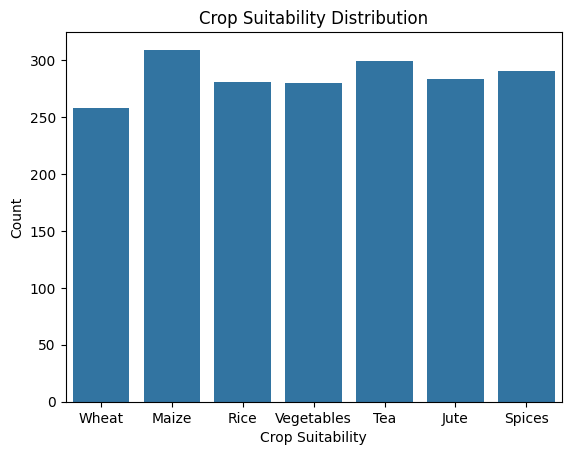

In [63]:
sns.countplot(x='Crop_Suitability',data=data)
plt.xlabel('Crop Suitability')
plt.ylabel('Count')
plt.title('Crop Suitability Distribution')
plt.show()

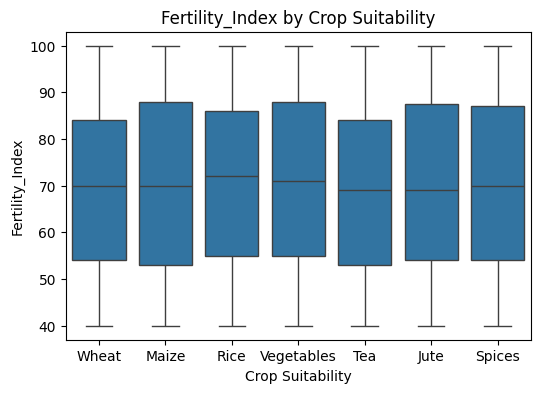

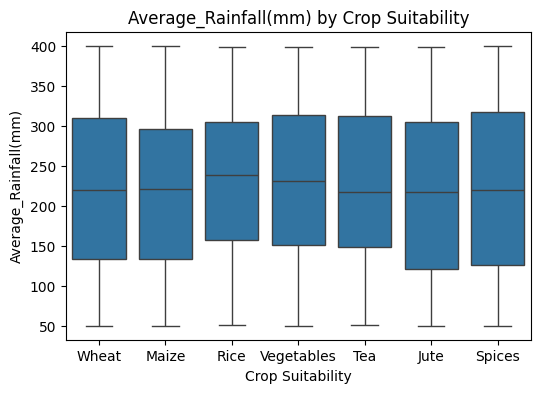

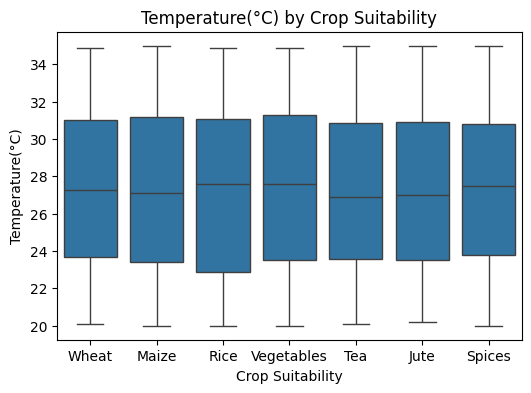

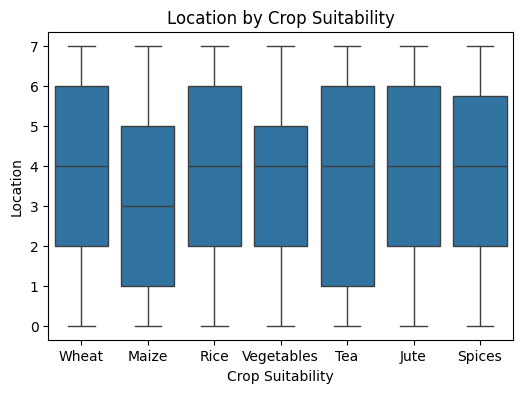

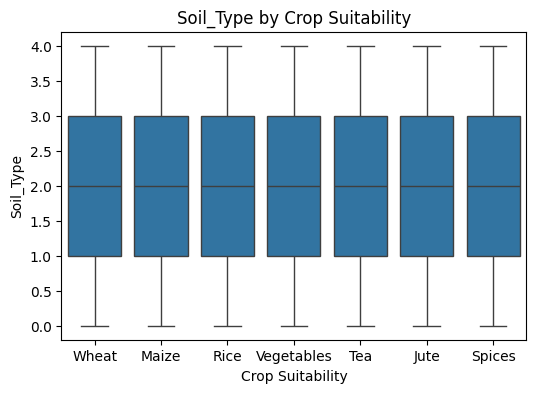

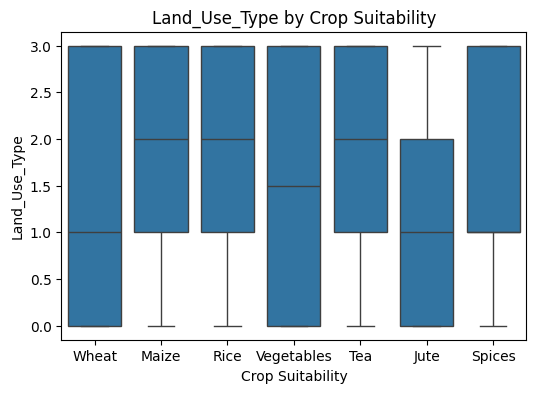

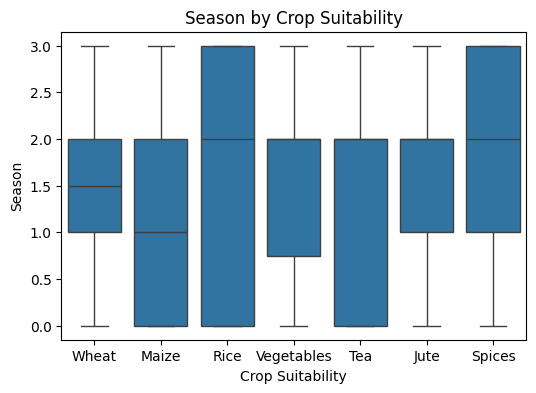

In [64]:
numerical_features = ['Fertility_Index','Average_Rainfall(mm)','Temperature(°C)','Location','Soil_Type','Land_Use_Type','Season']
for col in numerical_features:
  plt.figure(figsize = (6,4))
  sns.boxplot(x="Crop_Suitability", y= col, data=data)
  plt.xlabel('Crop Suitability')
  plt.ylabel(col)
  plt.title(f'{col} by Crop Suitability')
  plt.show()

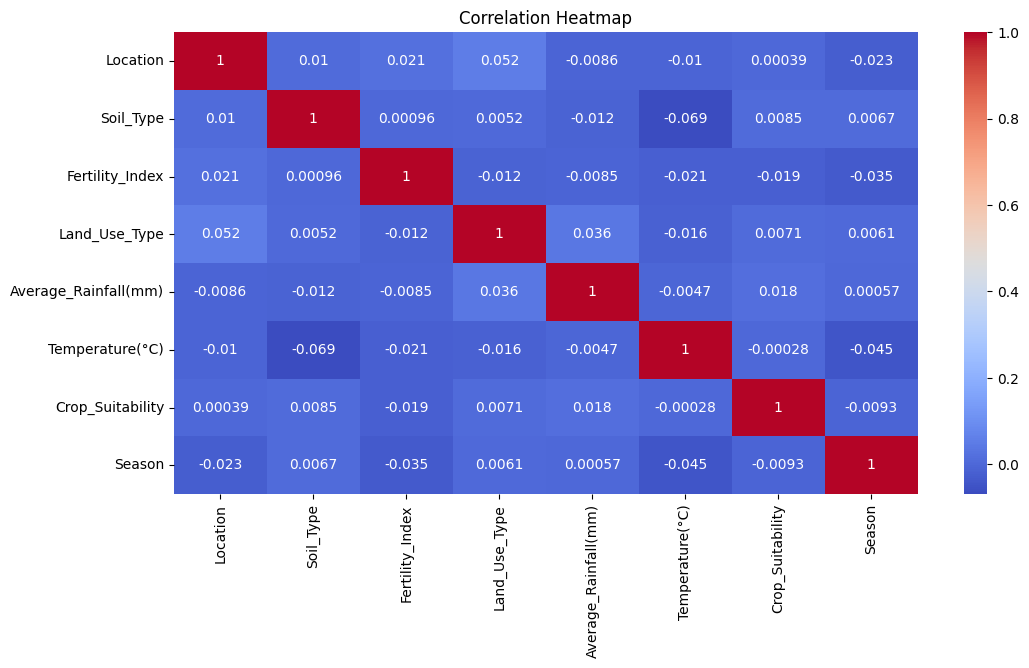

In [65]:
data['Crop_Suitability'] = data['Crop_Suitability'].astype('category')
data['Crop_Suitability'] = data['Crop_Suitability'].cat.codes

plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Logistic Regression from Scratch

In [66]:
# Data Preprocessing
X = data[['Fertility_Index', 'Average_Rainfall(mm)', 'Temperature(°C)', 'Soil_Type', 'Season']]
y = data['Crop_Suitability'].astype('category').cat.codes

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Standardize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Filter binary classes
binary_filter = (y == 0) | (y == 1)
X = X[binary_filter]
y = y[binary_filter]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [67]:
# Logistic Regression from Scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost_and_gradient(X, y, weights, bias):
    m = X.shape[0]
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    cost = -np.mean(y * np.log(predictions + 1e-8) + (1 - y) * np.log(1 - predictions + 1e-8))
    dw = np.dot(X.T, (predictions - y)) / m
    db = np.mean(predictions - y)
    return cost, dw, db

def gradient_descent(X, y, weights, bias, learning_rate=0.01, num_iterations=1000):
    for i in range(num_iterations):
        cost, dw, db = compute_cost_and_gradient(X, y, weights, bias)
        weights -= learning_rate * dw
        bias -= learning_rate * db
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    return weights, bias

def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    return (probabilities >= 0.5).astype(int)

weights = np.zeros(X_train.shape[1])
bias = 0
learning_rate = 0.01
num_iterations = 1000

weights, bias = gradient_descent(X_train.values, y_train.values, weights, bias, learning_rate, num_iterations)

y_train_pred = predict(X_train.values, weights, bias)
y_test_pred = predict(X_test.values, weights, bias)

Iteration 0: Cost = 0.6931
Iteration 100: Cost = 0.6918
Iteration 200: Cost = 0.6910
Iteration 300: Cost = 0.6905
Iteration 400: Cost = 0.6902
Iteration 500: Cost = 0.6900
Iteration 600: Cost = 0.6899
Iteration 700: Cost = 0.6898
Iteration 800: Cost = 0.6897
Iteration 900: Cost = 0.6897


In [69]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

print("Logistic Regression from Scratch")
evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_test, y_test_pred, "Testing")

Logistic Regression from Scratch

Training Evaluation:
Accuracy: 0.5362
Precision: 0.5391
Recall: 0.5905
F1 Score: 0.5636


Testing Evaluation:
Accuracy: 0.4494
Precision: 0.5046
Recall: 0.5556
F1 Score: 0.5288



In [70]:
# Model 1: Logistic Regression with Scikit-learn
log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, y_train)
y_pred_sklearn = log_reg_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-learn Logistic Regression Accuracy: {accuracy_sklearn:.4f}")
print(classification_report(y_test, y_pred_sklearn))

Scikit-learn Logistic Regression Accuracy: 0.4607
              precision    recall  f1-score   support

           0       0.38      0.33      0.35        79
           1       0.51      0.57      0.54        99

    accuracy                           0.46       178
   macro avg       0.45      0.45      0.44       178
weighted avg       0.45      0.46      0.46       178



In [71]:
# Model 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=20, min_samples_leaf=20, max_features='sqrt')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.5225
              precision    recall  f1-score   support

           0       0.46      0.44      0.45        79
           1       0.57      0.59      0.58        99

    accuracy                           0.52       178
   macro avg       0.51      0.51      0.51       178
weighted avg       0.52      0.52      0.52       178



In [72]:
print(f"Logistic Regression Accuracy: {accuracy_sklearn:.4f}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_sklearn))

print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

f1_sklearn = f1_score(y_test, y_pred_sklearn, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"\nLogistic Regression F1-score: {f1_sklearn:.4f}")
print(f"Random Forest F1-score: {f1_rf:.4f}")

if accuracy_sklearn > accuracy_rf:
    print("\nLogistic Regression performed better based on accuracy.")
else:
    print("\nRandom Forest performed better based on accuracy.")

if f1_sklearn > f1_rf:
    print("Logistic Regression performed better based on F1-score.")
else:
    print("Random Forest performed better based on F1-score.")

Logistic Regression Accuracy: 0.4607
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.38      0.33      0.35        79
           1       0.51      0.57      0.54        99

    accuracy                           0.46       178
   macro avg       0.45      0.45      0.44       178
weighted avg       0.45      0.46      0.46       178


Random Forest Accuracy: 0.5225
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.46      0.44      0.45        79
           1       0.57      0.59      0.58        99

    accuracy                           0.52       178
   macro avg       0.51      0.51      0.51       178
weighted avg       0.52      0.52      0.52       178


Logistic Regression F1-score: 0.4554
Random Forest F1-score: 0.5214

Random Forest performed better based on accuracy.
Random Forest performed better based on F1-score.


#Hyper-Parameter tuning and Feature Selection

In [73]:
# Model 1: Logistic Regression Hyperparameter Tuning
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print("Class distribution after Random Oversampling:", dict(Counter(y_resampled)))

param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search_log_reg = GridSearchCV(log_reg_sklearn, param_grid_log_reg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_log_reg.fit(X_resampled, y_resampled)

print("Best Hyperparameters for Logistic Regression:", grid_search_log_reg.best_params_)

log_reg_cv_score = cross_val_score(grid_search_log_reg.best_estimator_, X_resampled, y_resampled, cv=5)
print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_cv_score.mean():.4f}")

Class distribution after Random Oversampling: {0: 210, 1: 210}
Best Hyperparameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Logistic Regression Cross-Validation Accuracy: 0.4952


In [74]:
# Model 2: Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 10, 20, 30],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)

rf_cv_score = cross_val_score(grid_search_rf.best_estimator_, X_train, y_train, cv=5)
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_score.mean():.4f}")

Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 150}
Random Forest Cross-Validation Accuracy: 0.4687


In [78]:
# Feature Selection for Logistic Regression
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

select_k_best_log_reg = SelectKBest(f_classif, k=5)
X_train_selected_log_reg = select_k_best_log_reg.fit_transform(X_train, y_train)
X_test_selected_log_reg = select_k_best_log_reg.transform(X_test)

print("Selected Features for Logistic Regression:")
selected_features_log_reg = select_k_best_log_reg.get_support(indices=True)
print("Feature indices:", selected_features_log_reg)
print("Feature scores:", select_k_best_log_reg.scores_)

log_reg_selected = LogisticRegression()
log_reg_selected.fit(X_train_selected_log_reg, y_train)

y_pred_log_reg_selected = log_reg_selected.predict(X_test_selected_log_reg)
accuracy_log_reg_selected = accuracy_score(y_test, y_pred_log_reg_selected)
print(f"Logistic Regression with selected features Accuracy: {accuracy_log_reg_selected:.4f}")

Selected Features for Logistic Regression:
Feature indices: [0 1 2 3 4]
Feature scores: [5.39706895e-02 1.37544057e-01 1.18913398e-03 2.45978788e+00
 1.58418640e-01]
Logistic Regression with selected features Accuracy: 0.4607


In [79]:
# Feature Selection for Random Forest
select_from_rf = SelectFromModel(rf_model, threshold="median", max_features=5)
select_from_rf.fit(X_train, y_train)
X_train_selected_rf = select_from_rf.transform(X_train)
X_test_selected_rf = select_from_rf.transform(X_test)

print("Selected Features for Random Forest:")
selected_features_rf = select_from_rf.get_support(indices=True)
print("Feature indices:", selected_features_rf)

rf_selected = RandomForestClassifier(n_estimators=100)
rf_selected.fit(X_train_selected_rf, y_train)

y_pred_rf_selected = rf_selected.predict(X_test_selected_rf)
accuracy_rf_selected = accuracy_score(y_test, y_pred_rf_selected)
print(f"Random Forest with selected features Accuracy: {accuracy_rf_selected:.4f}")

Selected Features for Random Forest:
Feature indices: [0 1 2]
Random Forest with selected features Accuracy: 0.4888


#Final Model

In [80]:
# Final Random Forest Model with Best Hyperparameters and Selected Features
best_params_rf = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 20,
    'min_samples_leaf': 10,
    'max_features': 'sqrt',
    'bootstrap': True
}

rf_final = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    max_features=best_params_rf['max_features'],
    bootstrap=best_params_rf['bootstrap'],
    random_state=42
)

rf_final.fit(X_train_selected_rf, y_train)

y_pred_rf_final = rf_final.predict(X_test_selected_rf)
accuracy_rf_final = accuracy_score(y_test, y_pred_rf_final)

print(f"Final Random Forest Accuracy: {accuracy_rf_final:.4f}")

if accuracy_rf_final > accuracy_rf_selected:
    print("Model performance improved after using the best hyperparameters and selected features.")
else:
    print("Model performance did not improve after using the best hyperparameters and selected features.")

Final Random Forest Accuracy: 0.5393
Model performance improved after using the best hyperparameters and selected features.


From the result we can see that Random Forest model performed the best. Random Forest model was able to achieve better perfoemance through cross-validation techniques in addition to feature selection methods.

We developed two classification models: Logistic Regression and Random Forest Classifier. Initially, both models were built without any hyperparameter optimization or feature selection techniques.

We then performed hyperparameter tuning to find the optimal parameters for our models and evaluated their accuracy.

We used the SelectKBest function to implement feature selection after hyperparameter tuning, and using the f_classif selection method. We evaluated the selected features and incorporated the most effective ones.

In the final model, we applied the best hyperparameters and included only the features selected through feature selection.

We noticed that the accuracy decreased when we conducted hyperparameter optimization and feature selection. However, the trained models achieved higher precision when evaluating new datasets.



